# D207 Exploratory Data Analysis: Performance Assessment - OEM2 Task 1
## Edward Wu (Student ID 010870448)
### 01/27/2024

## Part 1 Question A
##### Does the customer's gender affect the length of tenure for a customer in this company?

### Loading dataframe from csv and initial cleaning procedures

In [1]:
# importing tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from scipy import stats

C:\Users\tassa\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# importing data by reading csv into a data frame
df = pd.read_csv('churn_clean.csv')

In [3]:
# Using .head() to verify the file loaded properly
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### Data Cleaning Steps to check for nulls and duplicates

In [4]:
# Assessing data quality with .info() to see data types and non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

### Finding Duplicates

In [5]:
# Detecting duplicates of each row
# using .duplicated() with .value_counts() to indicate how many are duplicated
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


### Finding Missing Values

In [6]:
# Detecting missing values for each variable
# using the isna() to show null variables
# and using .sum() to add the results to show how many per column are missing
df.isna().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
UID                        0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
TimeZone                   0
Job                        0
Children                   0
Age                        0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport   

# Part 2 Question B - Describe the Data Anaylsis

### Creating dataframe using the two isolated variables

In [7]:
# Creating new variable df_EDA
df_EDA = df[['Gender','Tenure']]
df_EDA.head()

,Gender,Tenure
0,Male,6.795513
1,Female,1.156681
2,Female,15.754144
3,Male,17.087227
4,Male,1.670972


In [8]:
# Use .describe() to provide initial statistical exploration
print(df_EDA.describe())

             Tenure
count  10000.000000
mean      34.526188
std       26.443063
min        1.000259
25%        7.917694
50%       35.430507
75%       61.479795
max       71.999280


In [9]:
# Using .info() to find the data type of these variables
print(df_EDA.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Tenure  10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB
None


The results here confirm what we already suspected, that ***'Gender'*** is categorical data with string datatype as **"object"** while ***'Tenure'*** is a continuous variable defined as **"float64"**

Because we can obtain summary statistics with **.describe()** on categorical data, we can instead run **.value_counts()** to obtain a count of all unique values

In [10]:
df_EDA[['Gender']].value_counts()

Gender   
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

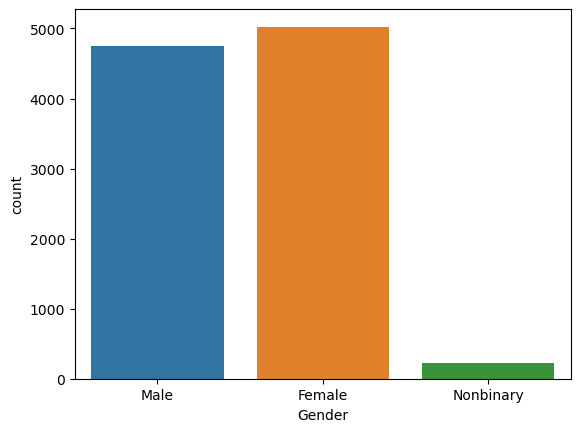

In [11]:
# Visualization of "Gender”
sns.countplot(data=df_EDA, x='Gender')

<Axes: xlabel='Tenure'>

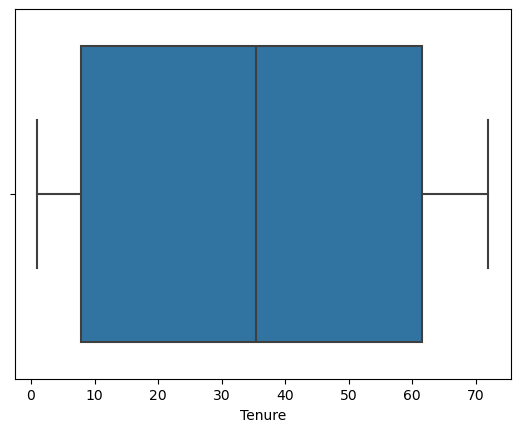

In [12]:
# Visualization of "Tenure”
sns.boxplot(x='Tenure',data=df_EDA)

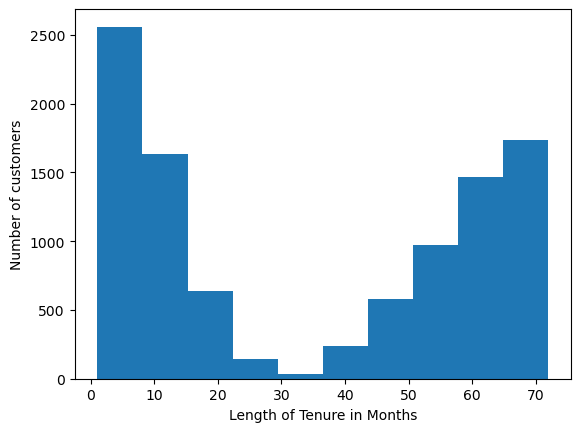

In [13]:
plt.hist(df_EDA[['Tenure']])
plt.xlabel('Length of Tenure in Months')
plt.ylabel('Number of customers')
plt.show()

Only 3 levels of cardinality (groups) in ***'Gender'***, they are: *'Male'*, *'Female'*, and *'Nonbinary'*.

Because T-test can only test up to 2 groups, a one-way ANOVA will be used to analyze the data

### B1 Using one-way ANOVA to analyze the data set

In [14]:
# Create arrays that separate gender groups along the 3 levels found previously using .value_counts()
Gender_Male = df_EDA[df_EDA.Gender == 'Male'].Tenure
Gender_Female = df_EDA[df_EDA.Gender == 'Female'].Tenure
Gender_Other = df_EDA[df_EDA.Gender == 'Nonbinary'].Tenure

In [15]:
# Execute one-way ANOVA
anova = stats.f_oneway(Gender_Male, Gender_Female, Gender_Other)

In [16]:
# Printing the results
print(anova)

F_onewayResult(statistic=1.394475845479805, pvalue=0.2480112013722494)


# Part 3 Question C - Distribution of two *Continuous variables* and two *Categorical variables* using ***Univariate Statistics***

In [17]:
# Isolating the 4 variables to be used to find distribution
# Continuous variables :  'MonthlyCharge', 'Income'
# Categorical variables : 'OnlineSecurity', 'DeviceProtection'

df_univar = df[['MonthlyCharge', 'Income', 'OnlineSecurity', 'DeviceProtection']]
df_univar.head()

,MonthlyCharge,Income,OnlineSecurity,DeviceProtection
0,172.455519,28561.99,Yes,No
1,242.632554,21704.77,Yes,No
2,159.947583,9609.57,No,No
3,119.956840,18925.23,Yes,No
4,149.948316,40074.19,No,No


In [18]:
# summary statistics from quantitative variables
df_univar.describe()

,MonthlyCharge,Income
count,10000.000000,10000.000000
mean,172.624816,39806.926771
std,42.943094,28199.916702
min,79.978860,348.670000
25%,139.979239,19224.717500
50%,167.484700,33170.605000
75%,200.734725,53246.170000
max,290.160419,258900.700000


In [19]:
# descriptive summary of categorical variables
df_univar[['OnlineSecurity', 'DeviceProtection']].describe()

,OnlineSecurity,DeviceProtection
count,10000,10000
unique,2,2
top,No,No
freq,6424,5614


### Graphs showing distribution

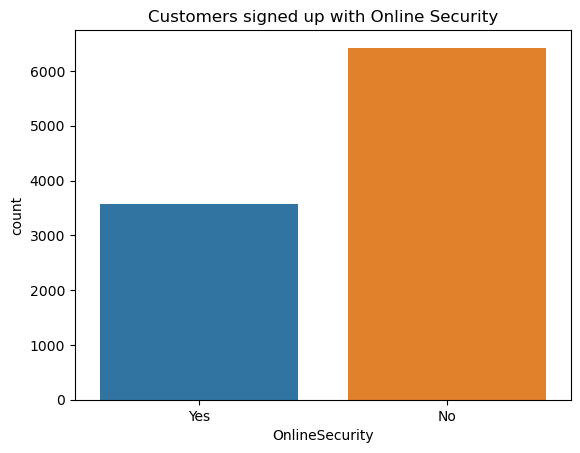

In [20]:
# Countplot used to show counts for categorical information
# 'order' parameter used to make both graphs uniform
sns.countplot(data=df_univar, x='OnlineSecurity', order=['Yes','No'])
plt.title('Customers signed up with Online Security')
plt.show()

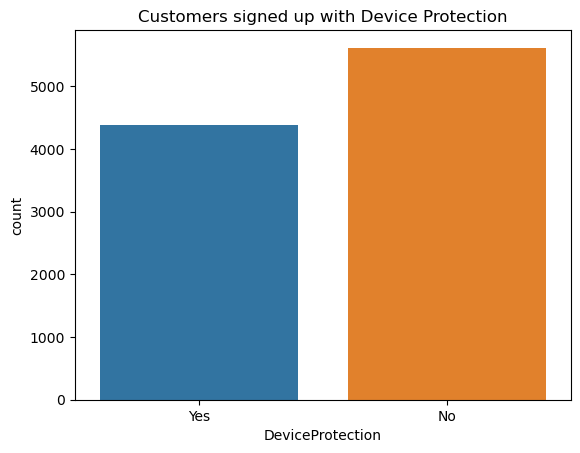

In [21]:
sns.countplot(data=df_univar, x='DeviceProtection', order=['Yes','No'])
plt.title('Customers signed up with Device Protection')
plt.show()

C:\Users\tassa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


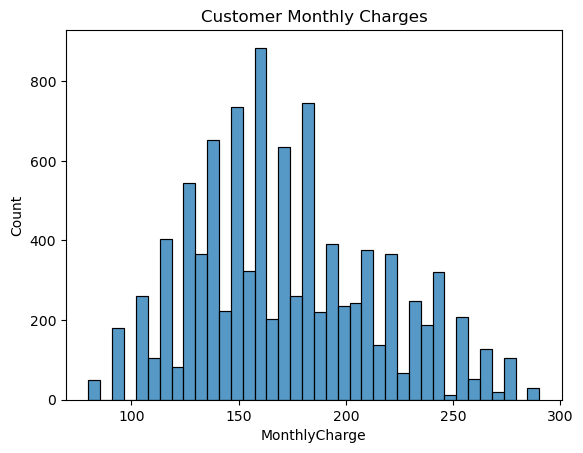

In [22]:
# histogram used to show frequency of values
sns.histplot(data=df_univar, x='MonthlyCharge')
plt.title('Customer Monthly Charges')
plt.show()

This first graph was ugly so we recreated the graph with less bins

C:\Users\tassa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


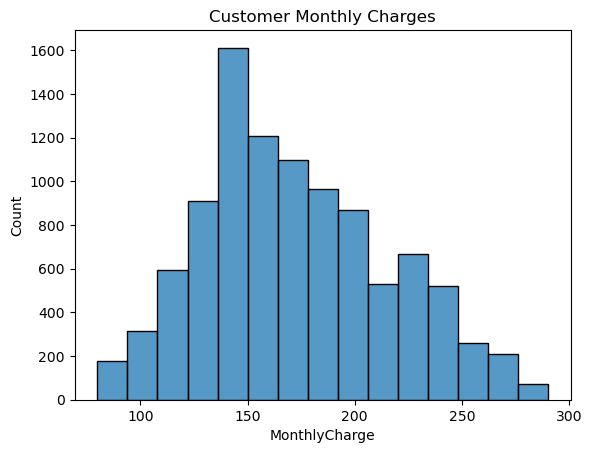

In [23]:
# SAME HISTOGRAM WITH LESS BINS
sns.histplot(data=df_univar, x='MonthlyCharge', bins=15)
plt.title('Customer Monthly Charges')
plt.show()

This second graph portrays a RIGHT-SKEWED distribution

C:\Users\tassa\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


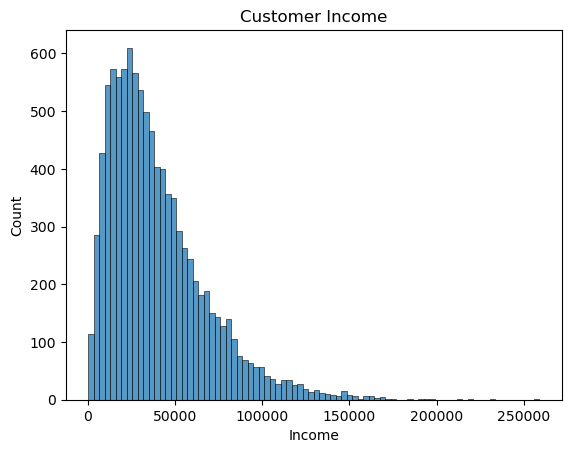

In [24]:
sns.histplot(data=df_univar, x='Income')
plt.title('Customer Income')
plt.show()

This graph has many bins but clearly shows a very HEAVILY RIGHT-SKEWED distribution

# Part 4 Question D - Distribution of two *Continuous variables* and two *Categorical variables* using ***Bivariate Statistics***

In [25]:
# Isolating the 4 variables to be used to find distribution
# Continuous variables :  'Outage_sec_perweek', 'Bandwidth_GB_Year'
# Categorical variables : 'PaperlessBilling', 'Techie'

df_bivar_cont = df[['Outage_sec_perweek', 'Bandwidth_GB_Year']]
df_bivar_cont.head()

,Outage_sec_perweek,Bandwidth_GB_Year
0,7.978323,904.536110
1,11.699080,800.982766
2,10.752800,2054.706961
3,14.913540,2164.579412
4,8.147417,271.493436


In [26]:
df_bivar_cat = df[['PaperlessBilling', 'Techie']]
df_bivar_cat.head()

,PaperlessBilling,Techie
0,Yes,No
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,No,No


In [27]:
# descriptive statistics from categorical values
df_bivar_cat.describe()

,PaperlessBilling,Techie
count,10000,10000
unique,2,2
top,Yes,No
freq,5882,8321


In [28]:
# summary statistics from quantitative variables
df_bivar_cont.describe()

,Outage_sec_perweek,Bandwidth_GB_Year
count,10000.000000,10000.000000
mean,10.001848,3392.341550
std,2.976019,2185.294852
min,0.099747,155.506715
25%,8.018214,1236.470827
50%,10.018560,3279.536903
75%,11.969485,5586.141370
max,21.207230,7158.981530


### Graphs showing distribution

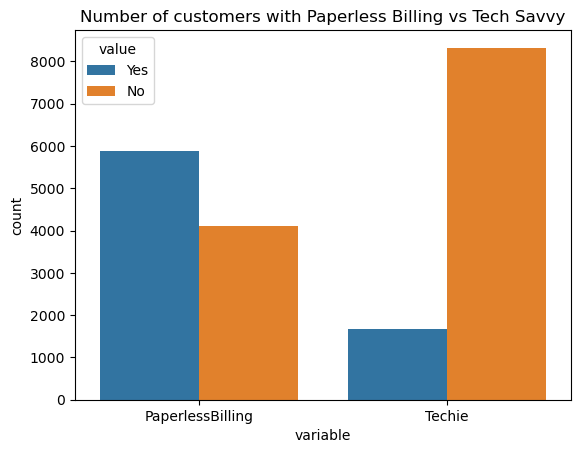

In [29]:
# Theory - Customers who opt for paperless billing tend to be more tech savvy, right?
# Bivariate graph of the two categorical variables
bivar_graph = pd.melt(df_bivar_cat)
sns.countplot(x='variable', hue='value', data=bivar_graph)
plt.title('Number of customers with Paperless Billing vs Tech Savvy')
plt.show()

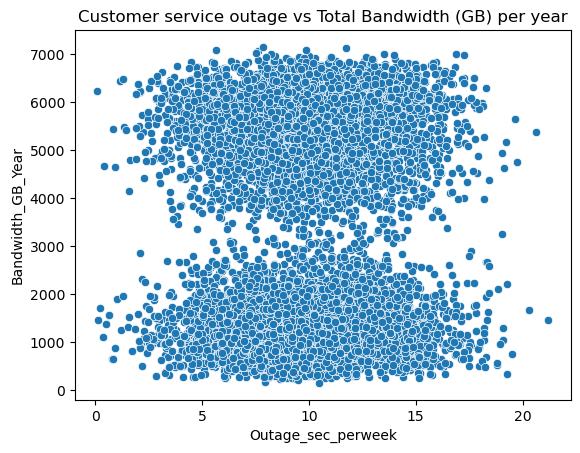

In [30]:
# Theory - Customers who experience more outages will be able to use less bandwidth, right?
sns.scatterplot(x='Outage_sec_perweek',y='Bandwidth_GB_Year',data=df_bivar_cont)
plt.title('Customer service outage vs Total Bandwidth (GB) per year')
plt.show()

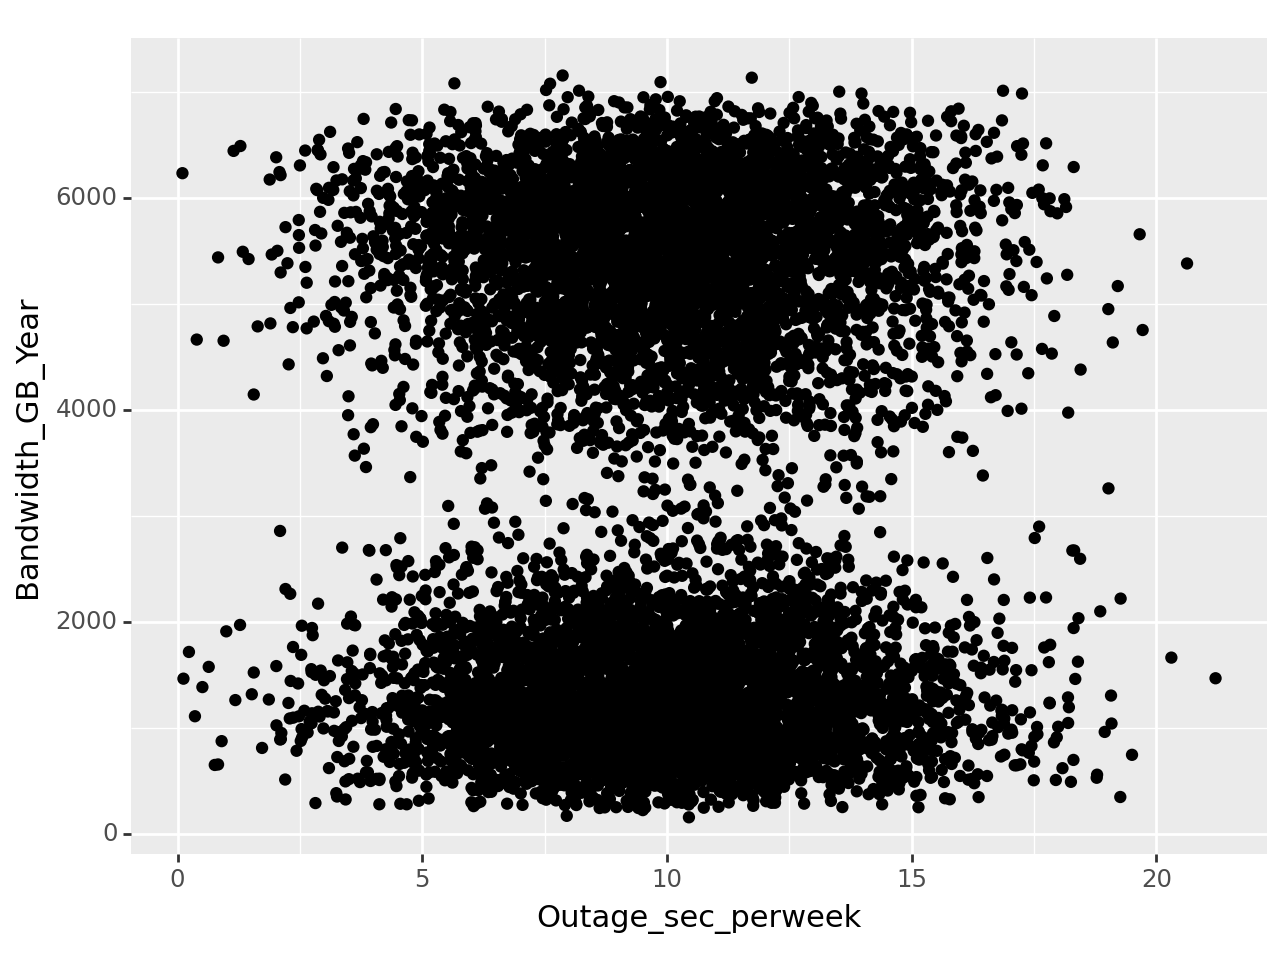

In [31]:
# Same plot but using plotnine package as taught by DataCamp
print(p9.ggplot(df_bivar_cont) + p9.aes(x='Outage_sec_perweek', y='Bandwidth_GB_Year') + p9.geom_point())